# Droplet Spreading over a spherical surface
![Spherical_spreading domain configuration](SphericalSpreading.png)


In this study, we consider a droplet spreading over a spherical surface for a very small Bond number ($Bo\ll1$), as described in [patel2017coupled](https://doi.org/10.1016/j.ces.2017.03.012) . This case study allows studying the spreading of a droplet over a complex surface discretized using an unstructured Cartesian three-dimensional mesh refined locally around the spherical object.  Ideally, for a droplet that spreads with $Bo\ll1$, surface tension forces dominate, and the droplet at equilibrium maintains a spherical cap shape and satisfies the contact angle boundary condition.

Volume: 4.188790204786391e-09


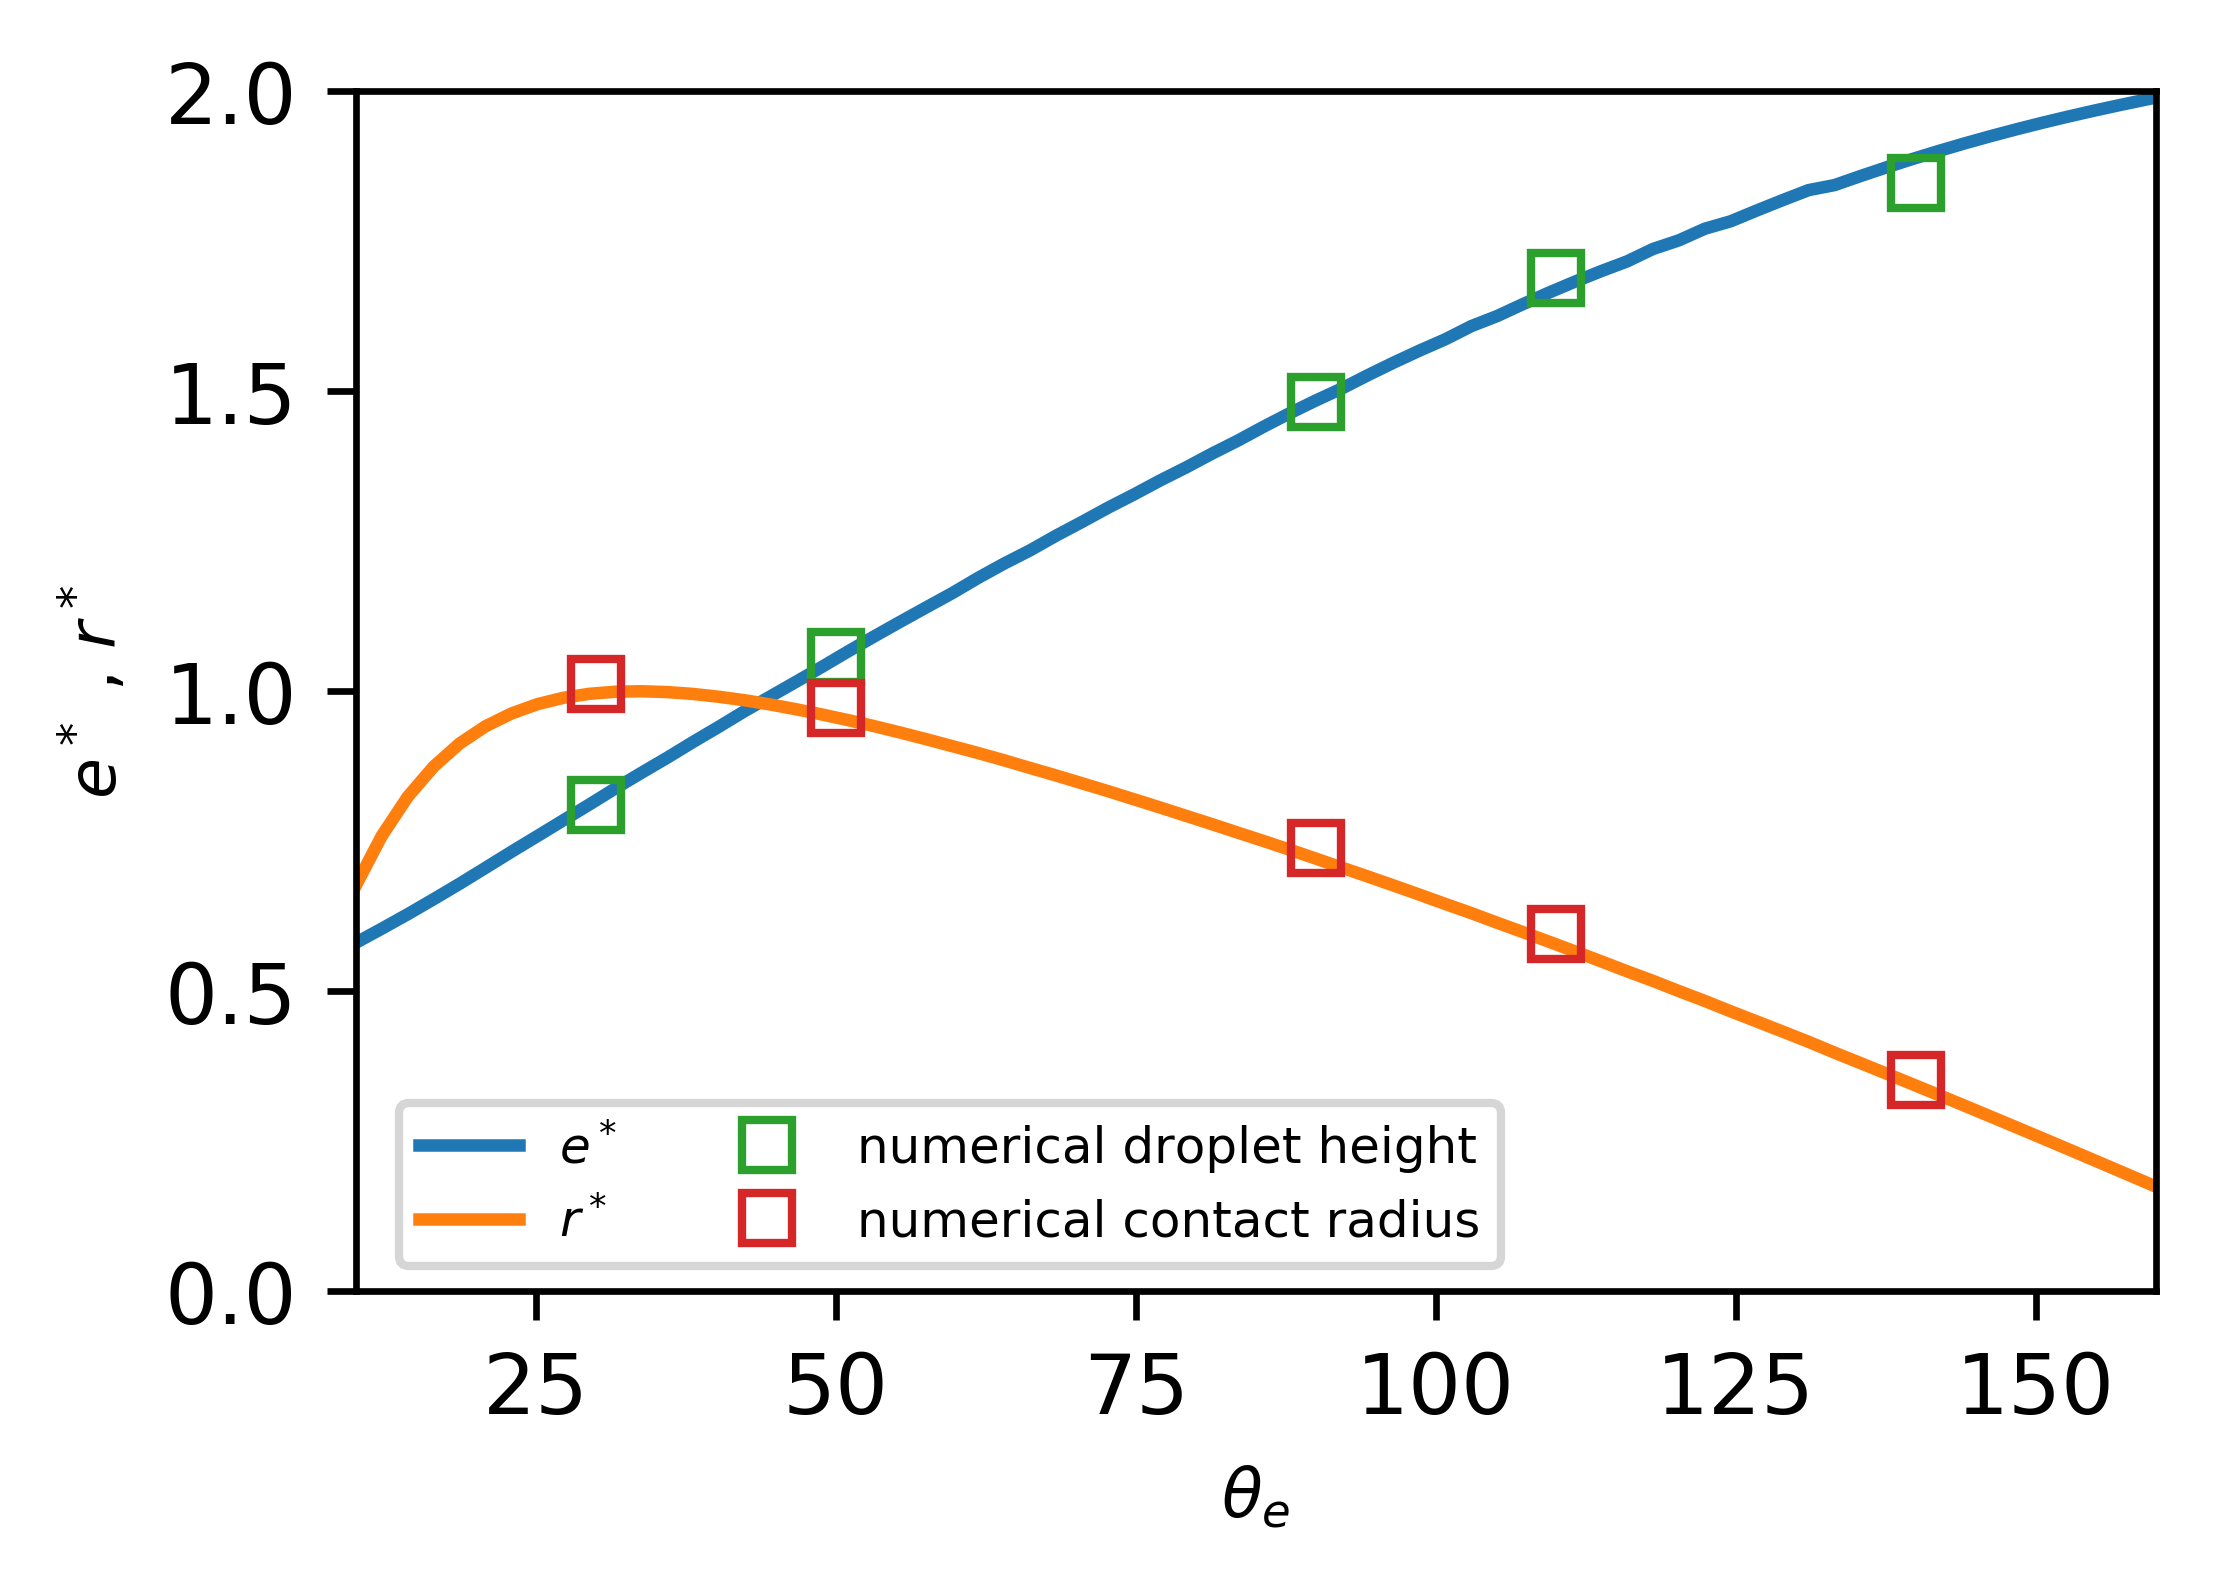

In [1]:
#Assumptions: 
#1.  z-axis is the height of the domain. 
#2.  if geometry changes, change the height of the sphere for droplet height calculations 

import numpy as np
from scipy.optimize import fsolve
import math
import sys
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import csv
import vtk
sys.path.append(os.path.join(os.getcwd(), '../modules'))
from spherical_spreading_funcs import Funcs
###################################################################################################################

sin =np.sin
cos= np.cos
pi = np.pi

#Degree range (x-axis)
thetaDeg =np.linspace(10, 170, 75) 
R0 = 0.001
V = 4/3*pi*R0**3
print("Volume: " + str(V))
eps = 1e-10
heightOfSphere = 0.00167581

rcParams["figure.dpi"] = 600
fontSize =8
calcHeights = False #True if the simulations are run again and need to write the height.csv from vtk files
###################################################################################################################

hf = [Funcs.getAngles(val,V,R0)[0] for idx, val in enumerate(thetaDeg)]
rf = [Funcs.getAngles(val,V,R0)[1] for idx, val in enumerate(thetaDeg)]

###################################################################################################################
## File structure (absolute working driectory)
def fileStructure(dataFile):
    #File structure
    pattern = "test_"
    dataFolder = "/postProcessing/"
    dataFile = dataFile
    cwd = os.getcwd()
    casefolders = [cwd + "/" + folder for folder in os.listdir(cwd) if pattern in folder]
    datafolders = [df+dataFolder for df in casefolders]
    datafolders.sort()
    fileNames = [fN+dataFile for fN in datafolders]
    return(fileNames)    

##################################################################################################################
vtk_folders = fileStructure('surfaces/')
heightFileNames =  fileStructure('height.csv')
rfMaxFileNames =  fileStructure('rfMax.csv')
#print(vtk_folders)
#print(heightFileNames)
#print(rfMaxFileNames)
Funcs.writeHeightFile(calcHeights,vtk_folders, heightFileNames)
##################################################################################################################

plotLabels = [r"numerical droplet height", r"numerical contact radius"]
#Plot equilibrium spread against static contact angle
fig = plt.figure()
myaxes = fig.add_axes([0.1, 0.1, 0.5, 0.5])
plt.plot(thetaDeg, hf, label=r'$e^*$')
plt.plot(thetaDeg, rf, label=r'$r^*$')
#plt.title(r'Droplet parameters for spreading over'+'\n' +r'a spherical surface - water_glycerol', fontsize=fontSize)
plt.xlabel(r'$\theta_e$' ,color='black',fontsize=fontSize)
plt.ylabel(r'$e^*$ , $r^*$',color='black',fontsize=fontSize)

simStaticCAList=[30, 50, 90, 110, 140] #contact angles for the simulaitons
equilibriumhfList= [None] *len(simStaticCAList)

nPointsForHeightAverage = 2
for idx, heightFile in enumerate(heightFileNames):
    avgHeight = 0
    for i in range(1, nPointsForHeightAverage):
        with open(heightFileNames[idx], "r") as f1:
            last_line = f1.readlines()[-i]
            avgHeight += (float(last_line.rsplit(',', 1)[1]) - heightOfSphere)

    avgHeight /= (nPointsForHeightAverage-1)
    equilibriumhfList[idx] = (avgHeight /R0 ) 

plt.plot(simStaticCAList, equilibriumhfList, marker='s', markerfacecolor='None',linestyle = 'None', label=plotLabels[0])
equilibriumrfList= [None] *len(simStaticCAList)
for idx, rfFile in enumerate(rfMaxFileNames):
        with open(rfMaxFileNames[idx], "r") as f1:
            last_line = f1.readlines()[-1]
            #print(last_line.rsplit(',', 1)[1])
            equilibriumrfList[idx] =(float(last_line.rsplit(',', 1)[1])/R0)

plt.plot(simStaticCAList, equilibriumrfList, marker='s', markerfacecolor='None', linestyle = 'None', label=plotLabels[1])

plt.ylim([0, 2])
plt.xlim([10, 160])
plt.legend(fontsize=6, loc='lower center', bbox_to_anchor=(0.33, 0), ncol=2)
plt.savefig('spherical-droplet-spreading-chractersitics-against-static-contact-angle'+'.pdf', bbox_inches='tight')
plt.savefig('spherical-droplet-spreading-chractersitics-against-static-contact-angle'+'.png', bbox_inches='tight')
plt.show()